In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pathlib import Path
import fastplotlib as fpl
import mbo_utilities as mbo
import dask.array as da
from tqdm import tqdm
import zarr
import tifffile
import numpy as np

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,560.94
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 560.94


In [2]:
base_dir = Path(r"D:\SANDBOX\demo")

In [3]:
files = mbo.get_files(base_dir, max_depth=1, str_contains='tif')
files

['D:\\SANDBOX\\demo\\mk303_mbo_2umpx_2roi_448umx896um_17p07_green_14planes_00001.tif']

In [4]:
scan = mbo.read_scan(files, join_contiguous=True)

In [5]:
scan.shape
planes = np.arange(scan.shape[1])
frames = np.arange(scan.shape[0])
image_shape = scan.shape[2:]
append_str = '_assembled'
path = Path(r"D:/SANDBOX/")

In [6]:
mbo.save_as(scan, path, planes=[1, 2, 3])

Reading tiff series data...
Reading tiff pages...
Raw tiff fully read.


Saving plane 1:   0%|          | 0/196 [00:00<?, ?it/s]

Saving plane 2:   0%|          | 0/196 [00:00<?, ?it/s]

Saving plane 3:   0%|          | 0/196 [00:00<?, ?it/s]

Time elapsed: 0 minutes 42 seconds.


In [7]:
gui = mbo.run_gui(scan)
type(gui)

Using ScanMultiROIReordered object
Running in Jupyter
Creating image widget


RFBOutputContext()

Running in Jupyter, returning image widget


fastplotlib.widgets.image_widget._widget.ImageWidget

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
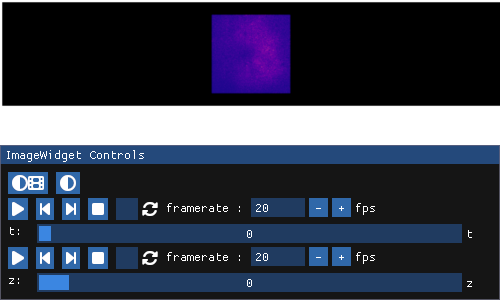

In [8]:
gui.show()

In [23]:
import matplotlib.pyplot as plt
from tqdm import tqdm

for z in tqdm(range(scan.shape[1])):
    spath = planes_path.resolve() / f'plane_{z+1}.npy'
    zp = scan[:, z, :, :]
    np.save(spath, zp)
    # mean_image = np.mean(zp, axis=0)
    # offset = mbo.return_scan_offset(mean_image)
    # arr[z] = offset
    # zp = mbo.fix_scan_phase(zp, offset)
    # mean_image_corr = np.mean(zp, axis=0)
    # offsets[f'plane_{z}'] = (offset, mean_image, mean_image)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [08:31<00:00, 36.51s/it]


In [ ]:
for z in range(scan.shape[1]):
    spath = planes_path.resolve() / f'plane_{z+1}.npy'
    spath_corr = planes_path.resolve() / f'plane_{z+1}_corr.npy'
    zp = np.load(spath,)
    zp= mbo.fix_scan_phase(zp, int(arr[z].compute()))
    np.save(spath_corr, zp)

Phase = 0, no correction applied.
Phase = 0, no correction applied.
Phase = 0, no correction applied.


In [36]:
arr.compute()

array([ 1.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1., -2.,  1.,
        1.])

RFBOutputContext()

C:\Users\RBO\miniforge3\envs\util_test\lib\site-packages\fastplotlib\graphics\_features\_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
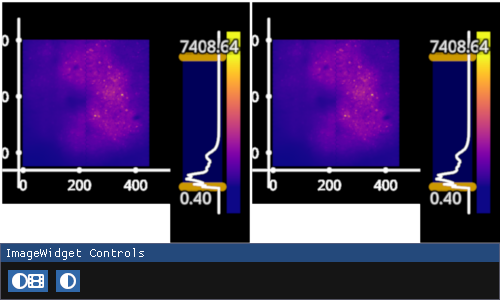

In [31]:
iw = fpl.ImageWidget(data=[offsets['plane_1'][1], offsets['plane_1'][2]])
iw.show()

In [27]:
arr_2d = np.random.randn(50, 50)  # 50x50 image
arr_3d = np.random.randn(20, 50, 50)  # movie with 20 frames
arr_4d = np.random.randn(20, 2, 50, 50)  # stack of movies with 20 frames

def get_subsampled_array(arr):
    # the only information this function has knowledge of is
    shape = arr.shape
    size = arr.size
    return shape, size

In [28]:
my_func(arr_4d)

((20, 2, 50, 50), 100000)

In [24]:
arr_2d

array([ 2, 42])